<a href="https://colab.research.google.com/github/llskyhi/109-2_BigDataProgramming/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages(
  c(
    "SportsAnalytics",
    "ggplot2"
  )
)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library("SportsAnalytics")
library("ggplot2")

In [5]:
data <- fetch_NBAPlayerStatistics("17-18")
head(data, 3)

,League,Name,Team,Position,GamesPlayed,TotalMinutesPlayed,FieldGoalsMade,FieldGoalsAttempted,ThreesMade,ThreesAttempted,⋯,Steals,Turnovers,Blocks,PersonalFouls,Disqualifications,TotalPoints,Technicals,Ejections,FlagrantFouls,GamesStarted
,<fct>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NBA,Alex Abrines,OKL,SG,74,1134,115,291,84,221,⋯,38,25,8,124,0,353,0,0,0,8
2,NBA,Quincy Acy,BRO,SF,70,1361,130,365,102,292,⋯,34,60,28,149,0,411,4,0,0,8
3,NBA,Steven Adams,OKL,C,76,2486,448,712,0,2,⋯,92,129,79,215,1,1056,9,0,0,76


In [57]:
colnames(data)

[1] "League"              "Name"                "Team"               
 [4] "Position"            "GamesPlayed"         "TotalMinutesPlayed" 
 [7] "FieldGoalsMade"      "FieldGoalsAttempted" "ThreesMade"         
[10] "ThreesAttempted"     "FreeThrowsMade"      "FreeThrowsAttempted"
[13] "OffensiveRebounds"   "TotalRebounds"       "Assists"            
[16] "Steals"              "Turnovers"           "Blocks"             
[19] "PersonalFouls"       "Disqualifications"   "TotalPoints"        
[22] "Technicals"          "Ejections"           "FlagrantFouls"      
[25] "GamesStarted"

`geom_smooth()` using formula 'y ~ x'



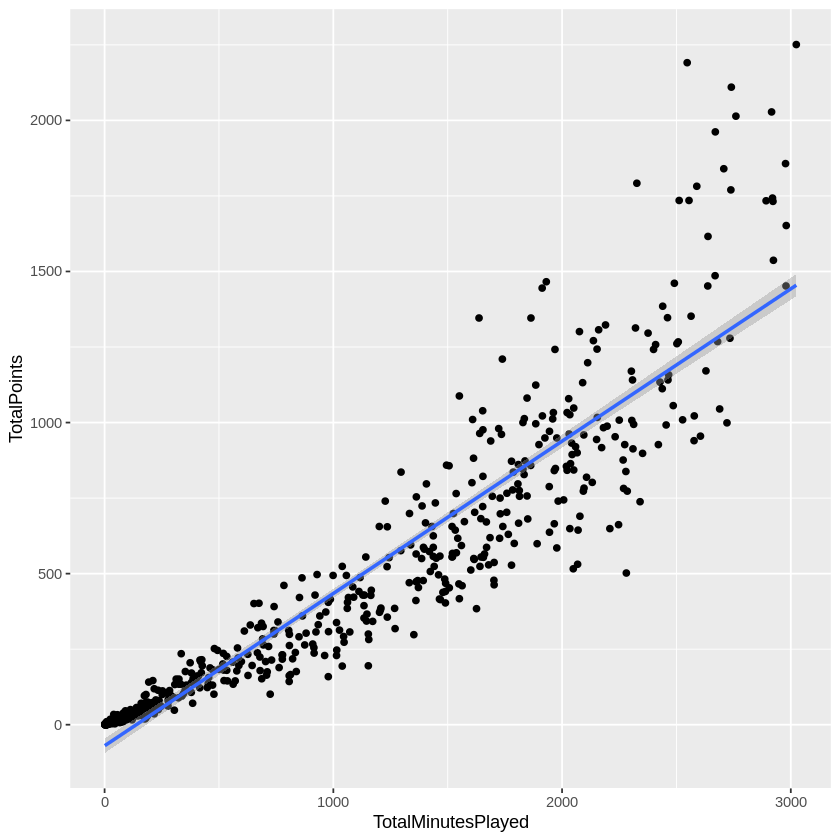

In [63]:
# 線性回歸?
ggplot(
  data,
  aes(
    x = TotalMinutesPlayed,
    y = TotalPoints
  )
)+
geom_point()+
geom_smooth(
  method = "glm"
)

`geom_smooth()` using formula 'y ~ x'



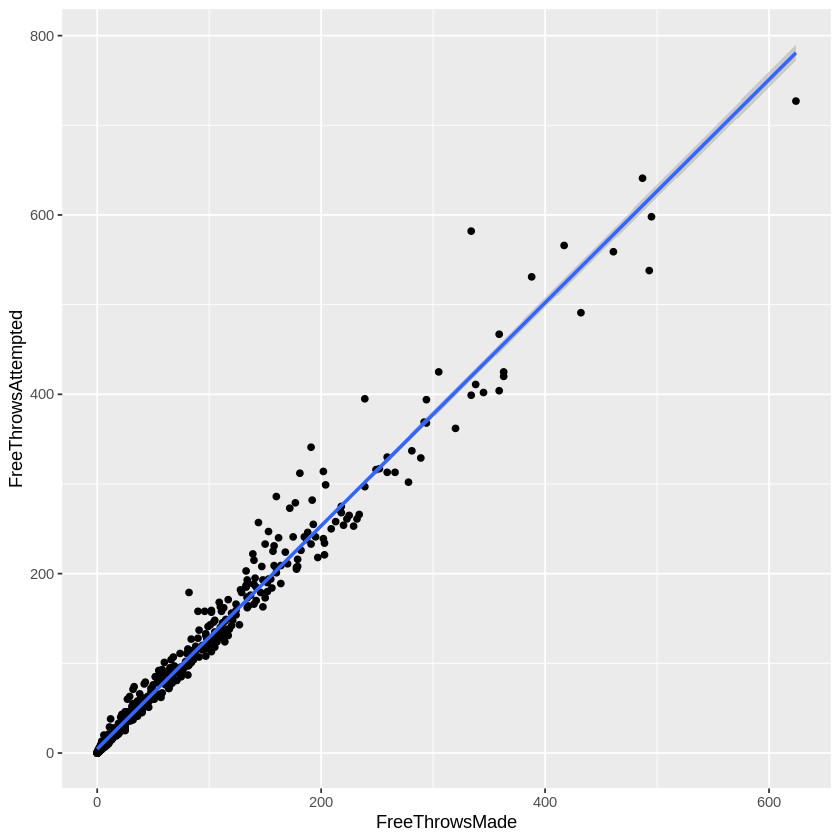

In [64]:
ggplot(
  data,
  aes(
    x = FreeThrowsMade,
    y = FreeThrowsAttempted
  )
)+
geom_point()+
geom_smooth(
  method = "glm"
)

In [10]:
lm(
  TotalPoints ~ TotalMinutesPlayed,
  data = data
)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = data)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  


In [13]:
glm(
  formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted,
  data = data
)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = data)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
         -12.081943            -0.009009             1.291930  

Degrees of Freedom: 539 Total (i.e. Null);  537 Residual
Null Deviance:	    117600000 
Residual Deviance: 2176000 	AIC: 6023

In [14]:
glm(
  formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + Position,
  data = data
)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = data)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           29.02535             -0.01681              1.31181  
         PositionPF           PositionPG           PositionSF  
          -29.81577            -57.56647            -39.12716  
         PositionSG  
          -58.55942  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    117300000 
Residual Deviance: 1963000 	AIC: 5966

In [16]:
data2 <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")
head(data2, 3)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1


In [21]:
data2$rank <- factor(data2$rank)
logit1 <-
  glm(
    admit ~ gre + gpa +rank,
    data = data2,
    family = "binomial"
  )
sum <- summary(logit1)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [22]:
install.packages("rpart")
library("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
DT <-
  rpart(
    Position ~ Blocks + ThreesMade + Assists + Steals,
    data = data
  )
DT

n=539 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 539 398 SG (0.14 0.21 0.2 0.19 0.26)  
    2) Blocks>=36.5 108  68 C (0.37 0.29 0.037 0.23 0.074)  
      4) ThreesMade< 6 35   8 C (0.77 0.17 0 0.057 0) *
      5) ThreesMade>=6 73  48 PF (0.18 0.34 0.055 0.32 0.11)  
       10) Assists< 159.5 40  19 PF (0.12 0.53 0 0.33 0.025)  
         20) Steals< 64 33  13 PF (0.15 0.61 0 0.21 0.03) *
         21) Steals>=64 7   1 SF (0 0.14 0 0.86 0) *
       11) Assists>=159.5 33  23 SF (0.24 0.12 0.12 0.3 0.21)  
         22) Blocks>=60.5 15   7 C (0.53 0.13 0.067 0.2 0.067) *
         23) Blocks< 60.5 18  11 SF (0 0.11 0.17 0.39 0.33) *
    3) Blocks< 36.5 431 298 SG (0.086 0.19 0.24 0.18 0.31)  
      6) Assists< 151.5 337 238 SG (0.11 0.23 0.16 0.21 0.29)  
       12) ThreesMade< 2.5 113  79 PF (0.27 0.3 0.13 0.13 0.17)  
         24) Blocks>=1.5 49  24 C (0.51 0.35 0.041 0.041 0.061) *
         25) Blocks< 1.5 64  

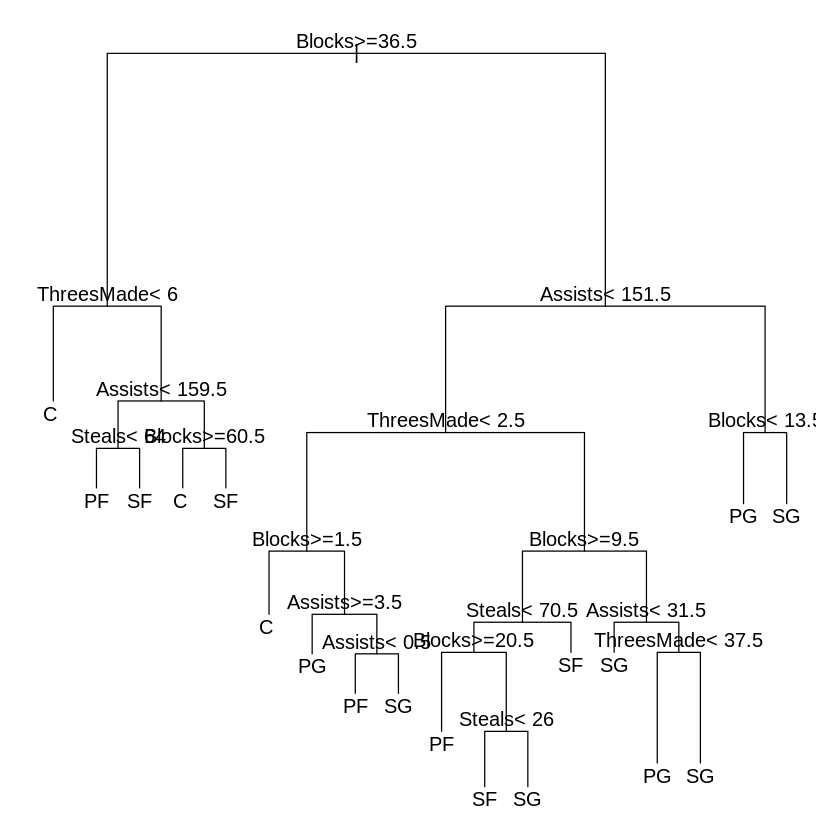

In [27]:
# 用其他數據判斷守備位置
par(
  mfrow = c(1,1),
  mar = rep(1, 4)
)
plot(DT)
text(DT)

In [29]:
install.packages("rpart.plot")
library("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



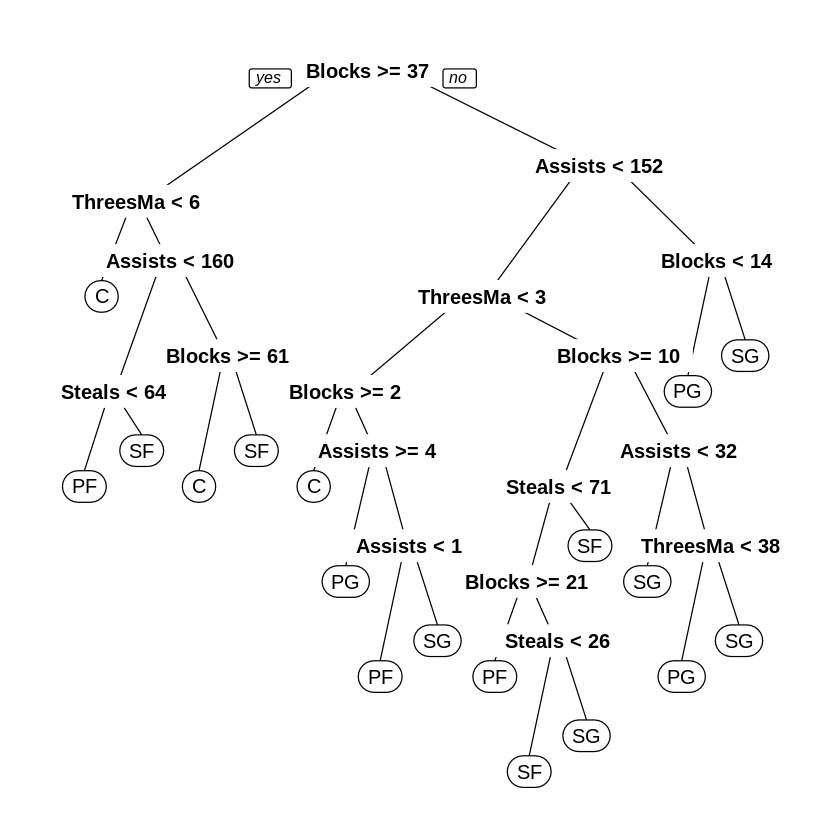

In [30]:
prp(DT)

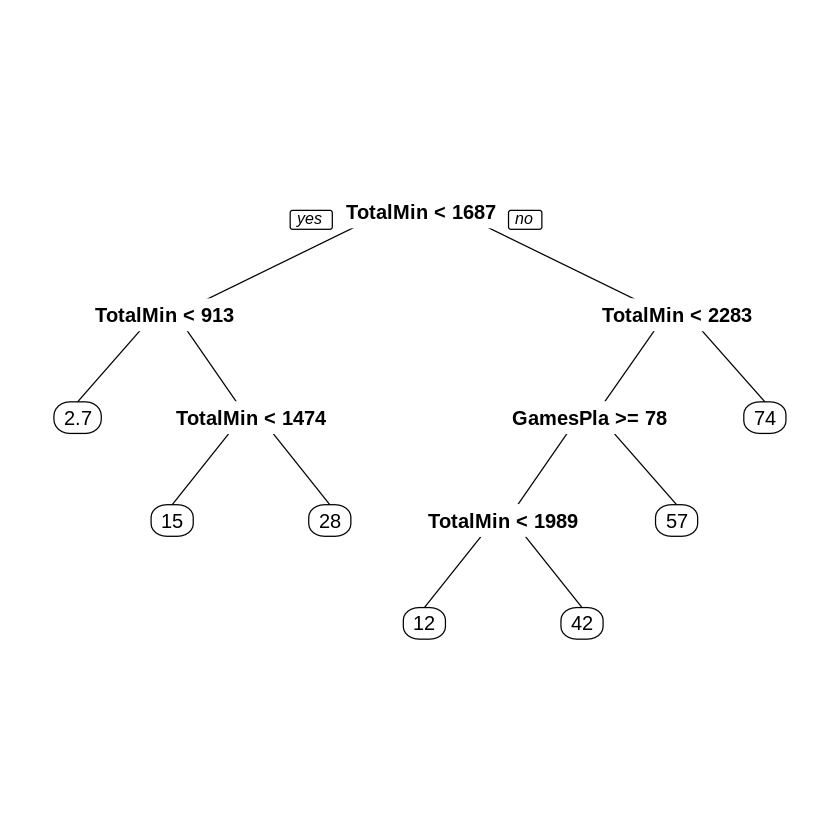

In [61]:
# 用總出場數/總出場分鐘數/總得分數 判斷總先發次數(應該吧?)
DT2 <-
  rpart(
    GamesStarted ~ GamesPlayed + TotalMinutesPlayed + TotalPoints,
    data = data
  )
  #DT2
prp(DT2)

In [31]:
install.packages(
  c(
    "arules",
    "datasets"
  )
)
library("arules")
library("datasets")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [39]:
data(Groceries)
Groceries@data@Dim

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [34]:
# 關聯式規則 從資料中找出資料間的關係, 稱為規則
rules <-
  apriori(
    data = Groceries,
    parameter = list(
      supp = 0.001,
      conf = 0.8
    ),
    control = list(verbose = F)
  )
options(digit = 2)
inspect(rules[1:5])

    lhs                        rhs            support     confidence
[1] {liquor,red/blush wine} => {bottled beer} 0.001931876 0.9047619 
[2] {curd,cereals}          => {whole milk}   0.001016777 0.9090909 
[3] {yogurt,cereals}        => {whole milk}   0.001728521 0.8095238 
[4] {butter,jam}            => {whole milk}   0.001016777 0.8333333 
[5] {soups,bottled beer}    => {whole milk}   0.001118454 0.9166667 
    coverage    lift      count
[1] 0.002135231 11.235269 19   
[2] 0.001118454  3.557863 10   
[3] 0.002135231  3.168192 17   
[4] 0.001220132  3.261374 10   
[5] 0.001220132  3.587512 11   


In [35]:
# 按照confidence排序
rules <-
  sort(
    rules,
    by = "confidence",
    decreasing = T
  )
inspect(rules[1:5])

    lhs                     rhs              support confidence    coverage     lift count
[1] {rice,                                                                                
     sugar}              => {whole milk} 0.001220132          1 0.001220132 3.913649    12
[2] {canned fish,                                                                         
     hygiene articles}   => {whole milk} 0.001118454          1 0.001118454 3.913649    11
[3] {root vegetables,                                                                     
     butter,                                                                              
     rice}               => {whole milk} 0.001016777          1 0.001016777 3.913649    10
[4] {root vegetables,                                                                     
     whipped/sour cream,                                                                  
     flour}              => {whole milk} 0.001728521          1 0.001728521 3.913649    17

In [55]:
# 按照lift排序
rules <-
  sort(
    rules,
    by = "lift",
    decreasing = T
  )
inspect(rules[1:5])

    lhs                        rhs                   support confidence    coverage      lift count
[1] {liquor,                                                                                       
     red/blush wine}        => {bottled beer}    0.001931876  0.9047619 0.002135231 11.235269    19
[2] {citrus fruit,                                                                                 
     other vegetables,                                                                             
     soda,                                                                                         
     fruit/vegetable juice} => {root vegetables} 0.001016777  0.9090909 0.001118454  8.340400    10
[3] {tropical fruit,                                                                               
     other vegetables,                                                                             
     whole milk,                                                                                   


In [37]:
# 買了什麼(lhs)的人會買牛奶(rhs)?
rulesR <-
  apriori(
    data = Groceries,
    parameter = list(supp = 0.001, conf = 0.08),
    appearance = list(
      default = "lhs",
      rhs = "whole milk"
    ),
    control = list(verbose = F)
  )
rulesR <- sort(
  rulesR,
  decreasing = T,
  by = "confidence"
)
inspect(rulesR[1:5])

    lhs                     rhs              support confidence    coverage     lift count
[1] {rice,                                                                                
     sugar}              => {whole milk} 0.001220132          1 0.001220132 3.913649    12
[2] {canned fish,                                                                         
     hygiene articles}   => {whole milk} 0.001118454          1 0.001118454 3.913649    11
[3] {root vegetables,                                                                     
     butter,                                                                              
     rice}               => {whole milk} 0.001016777          1 0.001016777 3.913649    10
[4] {root vegetables,                                                                     
     whipped/sour cream,                                                                  
     flour}              => {whole milk} 0.001728521          1 0.001728521 3.913649    17

In [53]:
# 買了什麼(lhs)的人會買報紙(rhs)?
rulesR <-
  apriori(
    data = Groceries,
    parameter = list(supp = 0.001, conf = 0.08),
    appearance = list(
      default = "lhs",
      rhs = "newspapers"
    ),
    control = list(verbose = F)
  )
rulesR <- sort(
  rulesR,
  decreasing = T,
  by = "confidence"
)
inspect(rulesR[1:5])

    lhs                   rhs              support confidence    coverage     lift count
[1] {tropical fruit,                                                                    
     other vegetables,                                                                  
     whole milk,                                                                        
     soda}             => {newspapers} 0.001118454  0.3666667 0.003050330 4.593843    11
[2] {other vegetables,                                                                  
     ice cream}        => {newspapers} 0.001830198  0.3600000 0.005083884 4.510318    18
[3] {beef,                                                                              
     chocolate}        => {newspapers} 0.001118454  0.3333333 0.003355363 4.176221    11
[4] {tropical fruit,                                                                    
     whole milk,                                                                        
     chocolate}      

In [54]:
# 買了啤酒(lhs)的人會買什麼(rhs)?
rulesR <-
  apriori(
    data = Groceries,
    parameter = list(supp = 0.001, conf = 0.08),
    appearance = list(
      default = "rhs",
      lhs = "bottled beer"
    ),
    control = list(verbose = F)
  )
rulesR <- sort(
  rulesR,
  decreasing = T,
  by = "confidence"
)
inspect(rulesR[1:5])

    lhs               rhs                support    confidence coverage  
[1] {}             => {whole milk}       0.25551601 0.2555160  1.00000000
[2] {bottled beer} => {whole milk}       0.02043721 0.2537879  0.08052872
[3] {bottled beer} => {soda}             0.01698017 0.2108586  0.08052872
[4] {bottled beer} => {other vegetables} 0.01616675 0.2007576  0.08052872
[5] {bottled beer} => {bottled water}    0.01576004 0.1957071  0.08052872
    lift      count
[1] 1.0000000 2513 
[2] 0.9932367  201 
[3] 1.2092094  167 
[4] 1.0375464  159 
[5] 1.7707259  155 


In [49]:
# 買了牛油(lhs)的人會買什麼(rhs)?
rulesR <-
  apriori(
    data = Groceries,
    parameter = list(supp = 0.001, conf = 0.08),
    appearance = list(
      default = "rhs",
      lhs = "butter"
    ),
    control = list(verbose = F)
  )
rulesR <- sort(
  rulesR,
  decreasing = T,
  by = "confidence"
)
inspect(rulesR[1:5])

    lhs         rhs                support    confidence coverage   lift    
[1] {butter} => {whole milk}       0.02755465 0.4972477  0.05541434 1.946053
[2] {butter} => {other vegetables} 0.02003050 0.3614679  0.05541434 1.868122
[3] {butter} => {yogurt}           0.01464159 0.2642202  0.05541434 1.894027
[4] {}       => {whole milk}       0.25551601 0.2555160  1.00000000 1.000000
[5] {butter} => {rolls/buns}       0.01342145 0.2422018  0.05541434 1.316780
    count
[1]  271 
[2]  197 
[3]  144 
[4] 2513 
[5]  132 


In [48]:
#str(Groceries)
Groceries@itemInfo

labels,level2,level1
<chr>,<fct>,<fct>
frankfurter,sausage,meat and sausage
sausage,sausage,meat and sausage
liver loaf,sausage,meat and sausage
ham,sausage,meat and sausage
meat,sausage,meat and sausage
finished products,sausage,meat and sausage
organic sausage,sausage,meat and sausage
chicken,poultry,meat and sausage
turkey,poultry,meat and sausage
